In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [2]:
reports = [
    "lora-2024-02-11-17-39-18-samples-100.csv",
    "lora-2024-02-11-17-48-53-samples-1000.csv",
    "lora-2024-02-11-17-59-25-samples-5000.csv",
    "lora-2024-02-11-18-28-44-samples-10000.csv",
    "lora-2024-02-11-19-41-50-samples-5000-epochs-2.csv",
    "lora-2024-02-12-08-53-55-samples-10000-epochs-2.csv",
    "lora-2024-02-11-20-39-28-samples-1000-epochs-5.csv",
    "lora-2024-02-11-22-04-12-samples-1000-epochs-10.csv"
]

In [3]:
def expected_has_function(row):
    return row["expected"].find("FUNCTION:") > 0

def base_found_function(row):
    return row["base"].find("FUNCTION:") > 0

def funetune_found_function(row):
    return row["finetune"].find("FUNCTION:") > 0

In [4]:
def prepare_dataframes():
    for filename in reports:
        df = pd.read_csv(filename)
        df["has_func"] = df.apply(expected_has_function,axis=1)
        df["base_found_func"] = df.apply(base_found_function,axis=1)
        df["finetune_found_func"] = df.apply(funetune_found_function,axis=1)
        if "finetune_found_finc" in df.columns:
            df.drop(columns=["finetune_found_finc"],inplace=True)
        df.to_csv(filename,index=False)

prepare_dataframes()

In [5]:
for filename in reports:
    print(filename, filename.split(".")[0].split("-")[8])

lora-2024-02-11-17-39-18-samples-100.csv 100
lora-2024-02-11-17-48-53-samples-1000.csv 1000
lora-2024-02-11-17-59-25-samples-5000.csv 5000
lora-2024-02-11-18-28-44-samples-10000.csv 10000
lora-2024-02-11-19-41-50-samples-5000-epochs-2.csv 5000
lora-2024-02-12-08-53-55-samples-10000-epochs-2.csv 10000
lora-2024-02-11-20-39-28-samples-1000-epochs-5.csv 1000
lora-2024-02-11-22-04-12-samples-1000-epochs-10.csv 1000


In [6]:
for filename in reports:
    print(filename, filename.split(".")[0].split("-epochs-")[-1])

lora-2024-02-11-17-39-18-samples-100.csv lora-2024-02-11-17-39-18-samples-100
lora-2024-02-11-17-48-53-samples-1000.csv lora-2024-02-11-17-48-53-samples-1000
lora-2024-02-11-17-59-25-samples-5000.csv lora-2024-02-11-17-59-25-samples-5000
lora-2024-02-11-18-28-44-samples-10000.csv lora-2024-02-11-18-28-44-samples-10000
lora-2024-02-11-19-41-50-samples-5000-epochs-2.csv 2
lora-2024-02-12-08-53-55-samples-10000-epochs-2.csv 2
lora-2024-02-11-20-39-28-samples-1000-epochs-5.csv 5
lora-2024-02-11-22-04-12-samples-1000-epochs-10.csv 10


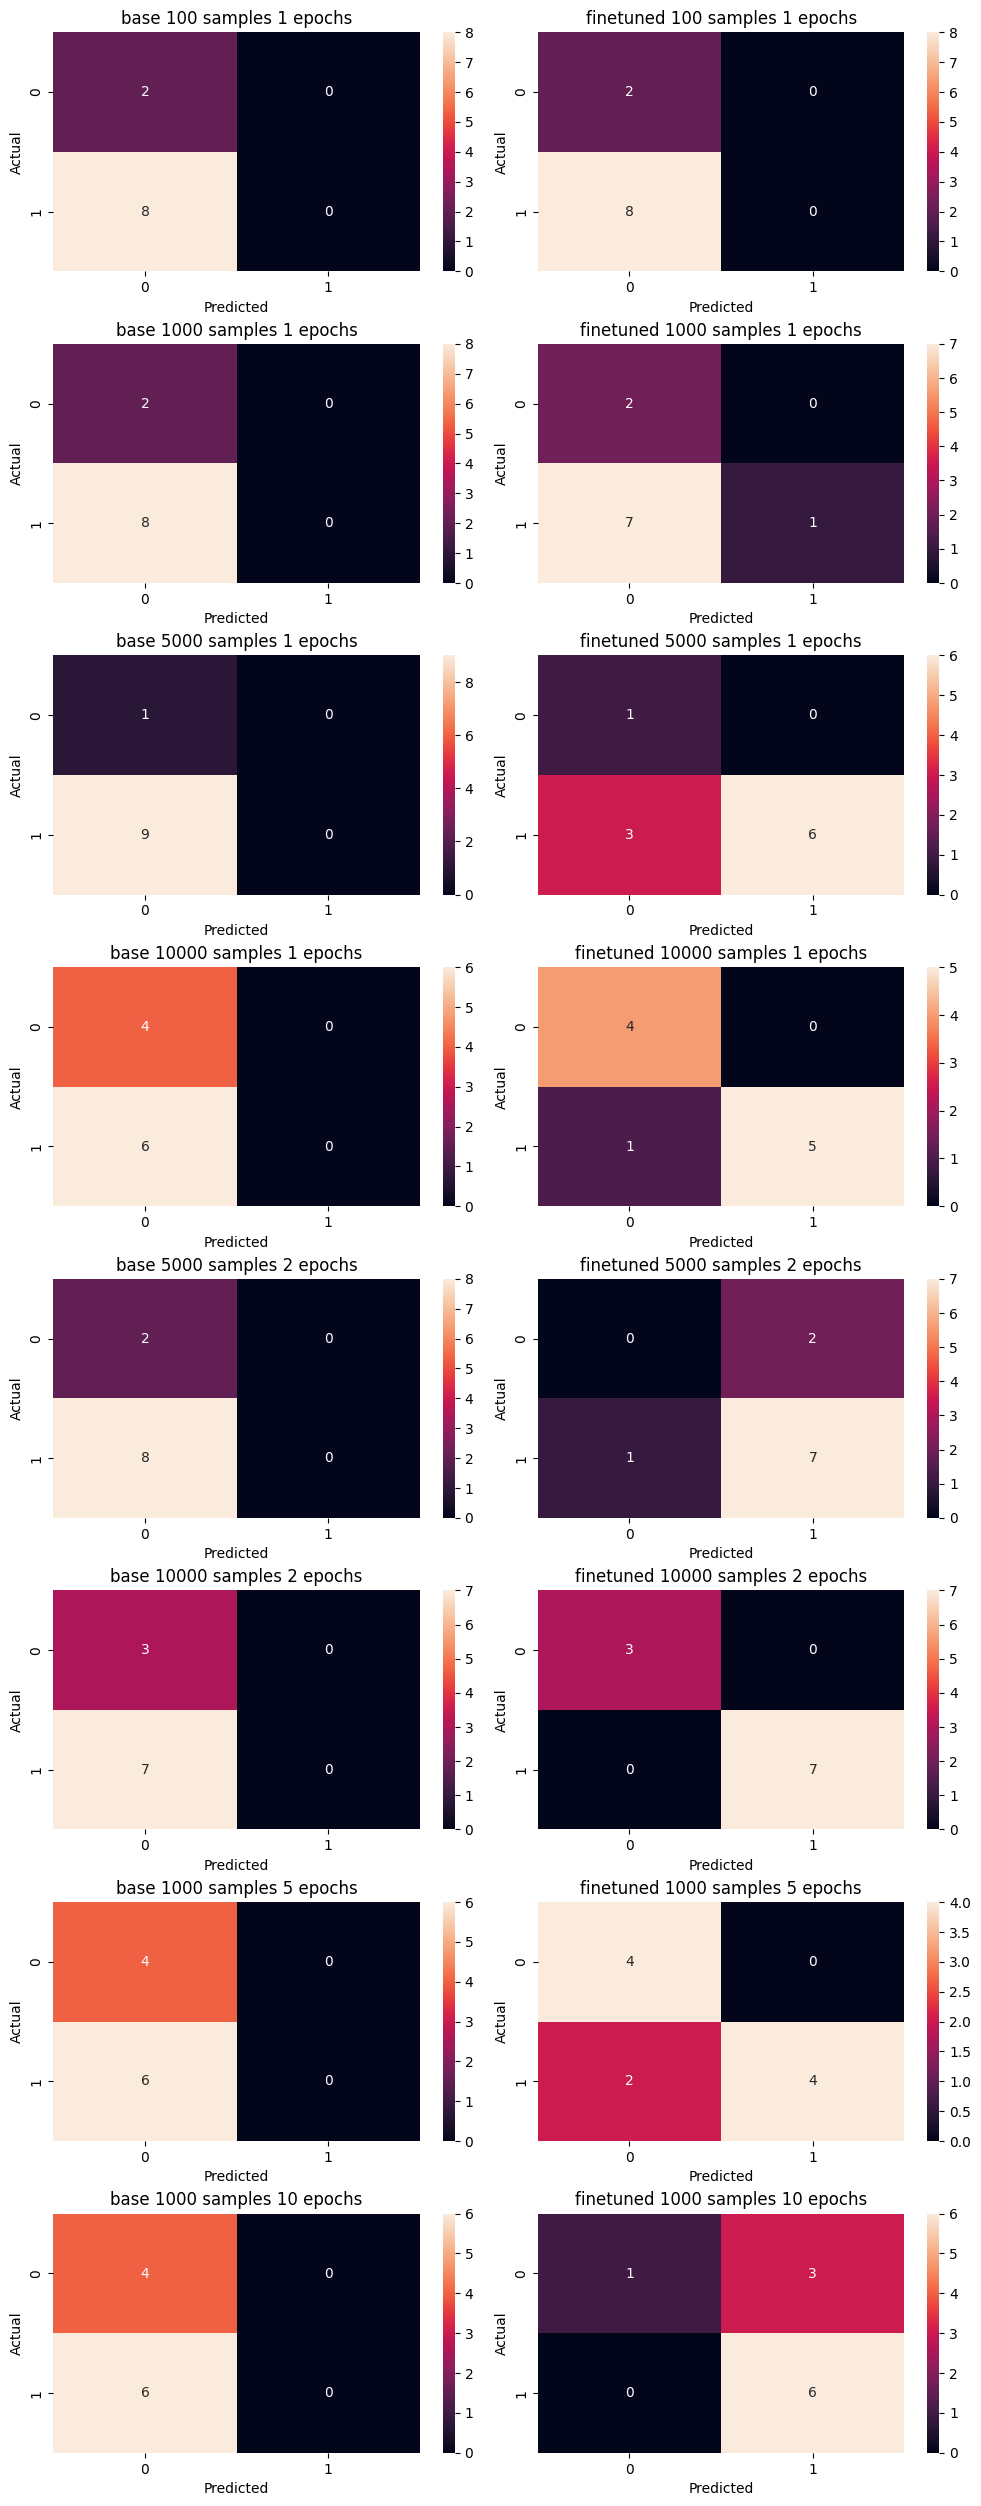

,samples,epochs,model,accuracy,precision,recall,f1
0,100,1,base,0.2,0.000000,0.000000,0.000000
1,100,1,finetuned,0.2,0.000000,0.000000,0.000000
2,1000,1,base,0.2,0.000000,0.000000,0.000000
3,1000,1,finetuned,0.3,1.000000,0.125000,0.222222
4,5000,1,base,0.1,0.000000,0.000000,0.000000
5,5000,1,finetuned,0.7,1.000000,0.666667,0.800000
6,10000,1,base,0.4,0.000000,0.000000,0.000000
7,10000,1,finetuned,0.9,1.000000,0.833333,0.909091
8,5000,2,base,0.2,0.000000,0.000000,0.000000
9,5000,2,finetuned,0.7,0.777778,0.875000,0.823529


In [7]:
metrics = pd.DataFrame()
fig = plt.figure(figsize=(10,25))
rows,cols = len(reports),2
for idx, filename in enumerate(reports):
    samples = int(filename.split(".")[0].split("-")[8])
    epochs = 1
    if len(filename.split(".")[0].split("-epochs-")) > 1:
        epochs = filename.split(".")[0].split("-epochs-")[-1]
    df = pd.read_csv(filename)
    expected = df["has_func"]
    base_found = df["base_found_func"]
    finetune_found = df["finetune_found_func"]
    cm_base = confusion_matrix(expected,base_found)
    cm_finetune = confusion_matrix(expected,finetune_found)
    plt.subplot(rows,cols, (idx*2)+1)
    plt.title(f"base {samples} samples {epochs} epochs")
    sns.heatmap(cm_base,annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.subplot(rows,cols, (idx*2)+2)
    plt.title(f"finetuned {samples} samples {epochs} epochs")
    sns.heatmap(cm_finetune,annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    m_b = {
        #"filename":filename,
        "samples":samples,
        "epochs": epochs,
        "model":"base",
        "accuracy":accuracy_score(expected,base_found),
        "precision":precision_score(expected,base_found,zero_division=0),
        "recall":recall_score(expected,base_found,zero_division=0),
        "f1":f1_score(expected,base_found),
    }
    m_f = {
        #"filename":filename,
        "samples":samples,
        "epochs": epochs,
        "model":"finetuned",
        "accuracy":accuracy_score(expected,finetune_found),
        "precision":precision_score(expected,finetune_found,zero_division=0),
        "recall":recall_score(expected,finetune_found,zero_division=0),
        "f1":f1_score(expected,finetune_found),
    }
    df_m = pd.DataFrame.from_dict([m_b,m_f])
    metrics = pd.concat([metrics,df_m],ignore_index=True)
    
fig.tight_layout(pad=0.5)
plt.show()
metrics

In [8]:
metrics[metrics.model != "finetuned"]

,samples,epochs,model,accuracy,precision,recall,f1
0,100,1,base,0.2,0.0,0.0,0.0
2,1000,1,base,0.2,0.0,0.0,0.0
4,5000,1,base,0.1,0.0,0.0,0.0
6,10000,1,base,0.4,0.0,0.0,0.0
8,5000,2,base,0.2,0.0,0.0,0.0
10,10000,2,base,0.3,0.0,0.0,0.0
12,1000,5,base,0.4,0.0,0.0,0.0
14,1000,10,base,0.4,0.0,0.0,0.0


In [9]:
metrics[metrics.model == "finetuned"]

,samples,epochs,model,accuracy,precision,recall,f1
1,100,1,finetuned,0.2,0.000000,0.000000,0.000000
3,1000,1,finetuned,0.3,1.000000,0.125000,0.222222
5,5000,1,finetuned,0.7,1.000000,0.666667,0.800000
7,10000,1,finetuned,0.9,1.000000,0.833333,0.909091
9,5000,2,finetuned,0.7,0.777778,0.875000,0.823529
11,10000,2,finetuned,1.0,1.000000,1.000000,1.000000
13,1000,5,finetuned,0.8,1.000000,0.666667,0.800000
15,1000,10,finetuned,0.7,0.666667,1.000000,0.800000


In [10]:
metrics = pd.read_csv("metrics.csv")
metrics

,run_name,samples,train_runtime,train_loss,global_step,epochs
0,lora-2024-02-11-17-39-18-samples-100,100,18.6664,0.837787,5,1
1,lora-2024-02-11-17-48-53-samples-1000,1000,193.4668,0.415997,45,1
2,lora-2024-02-11-17-59-25-samples-5000,5000,1238.9249,0.214476,227,1
3,lora-2024-02-11-18-28-44-samples-10000,10000,3153.9444,0.177438,455,1
4,lora-2024-02-11-19-41-50-samples-5000-epochs-2,5000,2465.3345,0.172490,454,2
5,lora-2024-02-11-20-39-28-samples-1000-epochs-5,1000,972.5550,0.195687,225,5
6,lora-2024-02-11-22-04-12-samples-1000-epochs-10,1000,1960.6943,0.131118,460,10
7,lora-2024-02-12-08-53-55-samples-10000-epochs-2,10000,6329.1559,0.146952,910,2


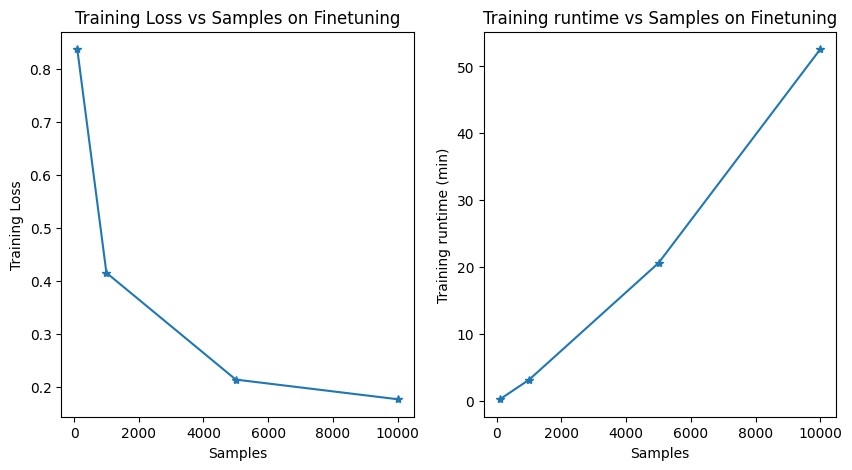

In [11]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Training Loss vs Samples on Finetuning")
plt.plot('samples','train_loss','*-',data=metrics[metrics.epochs == 1])
plt.xlabel("Samples")
plt.ylabel("Training Loss")
plt.subplot(1,2,2)
plt.title("Training runtime vs Samples on Finetuning")
plt.plot(metrics[metrics.epochs == 1]['samples'],metrics[metrics.epochs == 1]['train_runtime']/60,'*-')
plt.xlabel("Samples")
plt.ylabel("Training runtime (min)")
plt.show()